# Analysis
Let's dive right into the analysis.

## 1. Data
The data "EGC_Post.csv" contains IPOs from April 5, 2012 (i.e., after the JOBS Act) to 2015. The sample only includes Emerging Growth Companies (EGCs), IPOs with revenues below $1B, because they are the only ones that are allowed to reduce financial disclosures.

### 1.1. Variable Definition
- *gvkey*: firm identifier
- *IPOYear*: year of the IPO
- *ReducedDisclosure*: target class; 1 if reduced financial disclosure; 0 otherwise
- *LogAge*: Natural logarithm of firm age 
- *LogAsset*: Natural logarithm of the dollar amount of total assets
- *LogOnePlusRevt*: Natural logarithm of one plus revenues
- *LogProceeds*: Natural logarithm of total dollar gross proceeds
- *PercentSharesRetained*: Fraction of shares outstanding in the company that is retained by
pre-IPO shareholders
- *OfferPriceRevision*: Percentage change in offer price from the midpoint of the
preliminary offer price range
- *LogDaysInRegistration*: Natural logarithm of the number of days between the S-1 filing
date and the IPO date
- *ReturnOnAssets*: Net income divided by total assets
- *RD*: R&D expense divided by total assets
- *CapitalExpenditures*: Capital expenditure divided by total assets
- *NegativeROA*: An indicator variable that = 1 if the company reports negative
net income
- *NegativeBVE*: An indicator variable that = 1 if the company reports negative
book value of equity
- *PositiveRD*: An indicator variable that = 1 if the company reports positive
R&D expense
- *VentureBacked*: An indicator variable = 1 if the issuer has venture-capital
backing
- *TechIndustry*: An indicator variable = 1 if the issuer is in the Internet Software
& Services industry (GICS Code 451010) or the Software industry
(GICS Code 451030)
- *BiotechPharmaIndustry*: An indicator variable = 1 if the issuer is in the Biotechnology
industry (GICS Code 352010) or the Pharmaceutical industry
(GICS Code 352020)
- *Nasdaq*: An indicator variable = 1 if the issuer is listed on NASDAQ
- *NYSE*: An indicator variable = 1 if the issuer is listed on NYSE
- *Underwriters*: An indicator variable that = 1 if Loughran and Ritter’s (2004)
IPO underwriter rank score is = 9
- *Big4*: An indicator variable = 1 if the issuer is audited by Deloitte,
Ernest & Young, KPMG, or PwC
- *NIPO*: Number of IPOs in registration in the 90 days prior to the IPO. 
- *NasdaqPrior90Ret*: Average buy-and-hold return of all NASDAQ-traded stocks
during the 90 days prior to the IPO

## 2. Implementation of Predicting Reduced-Disclosure Firms
### 2.1. Preparation
#### 2.1.1. Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### 2.1.2. Read the CSV File 

In [2]:
disclosure_df = pd.read_csv("EGC_Post.csv")

### 2.2. Exploratory Data Analysis (EDA)
#### 2.2.1. Explore the dataframe

In [3]:
# View the first 5 entries
disclosure_df.head()

,gvkey,IPOYear,ReducedDisclosure,LogAge,LogAsset,LogOnePlusRevt,LogProceeds,PercentSharesRetained,OfferPriceRevision,LogDaysInRegistration,...,PositiveRD,VentureBacked,TechIndustry,BiotechPharmaIndustry,Nasdaq,NYSE,Underwriters,Big4,NIPO,NasdaqPrior90Ret
0,171141,2012,0,2.397895,4.901765,5.697473,5.102667,0.826460,0.062500,4.510860,...,0,0,0,0,1,0,1,1,14,-0.007962
1,171067,2012,0,2.079442,4.512748,4.784128,5.566052,0.908191,0.076923,4.644391,...,1,1,0,0,0,1,1,1,14,-0.001697
2,11922,2012,0,4.007333,4.368371,5.581781,4.683427,0.687737,0.071429,3.583519,...,0,0,0,0,0,1,0,1,14,-0.027582
3,171097,2012,0,1.945910,2.097036,0.000000,3.931826,0.684384,-0.166667,4.634729,...,1,1,0,1,1,0,0,1,14,-0.046843
4,170965,2012,0,3.610918,5.205648,5.099708,4.406719,0.800660,-0.307692,3.610918,...,0,0,0,0,1,0,1,1,15,0.002627


We have firm identifiers (gvkey), the outcome variable we want to predict (ReducedDisclosure), and many firm characteristics.

In [4]:
# View info
disclosure_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gvkey                  380 non-null    int64  
 1   IPOYear                380 non-null    int64  
 2   ReducedDisclosure      380 non-null    int64  
 3   LogAge                 380 non-null    float64
 4   LogAsset               380 non-null    float64
 5   LogOnePlusRevt         380 non-null    float64
 6   LogProceeds            380 non-null    float64
 7   PercentSharesRetained  380 non-null    float64
 8   OfferPriceRevision     380 non-null    float64
 9   LogDaysInRegistration  380 non-null    float64
 10  ReturnOnAssets         380 non-null    float64
 11  RD                     380 non-null    float64
 12  CapitalExpenditures    380 non-null    float64
 13  NegativeROA            380 non-null    int64  
 14  NegativeBVE            380 non-null    int64  
 15  Positi

Two things are worth noting. All the variables have non-missing data since I already cleaned them. Also, all of them have numeric values.

#### 2.2.2. Visualize firm characteristics

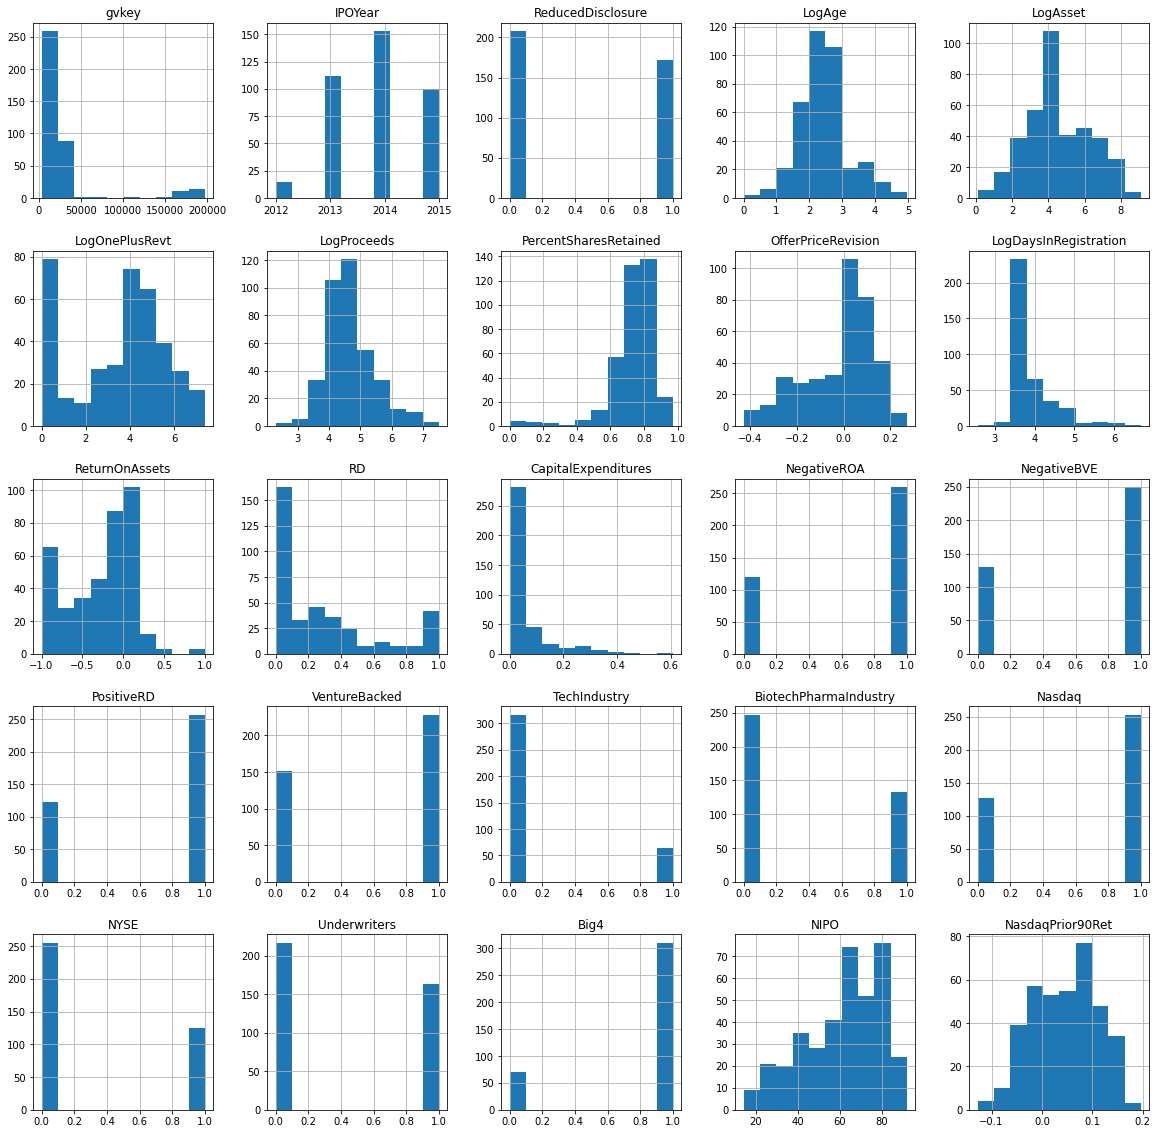

In [5]:
# Plot histograms
disclosure_df.hist(figsize = (20,20))
plt.show()

Based on the histogram above, we see that there are both continuous variables and indicator variables (i.e., 0/1 binary) and that there are no outliers.

#### 2.2.3. Correlation Matrix

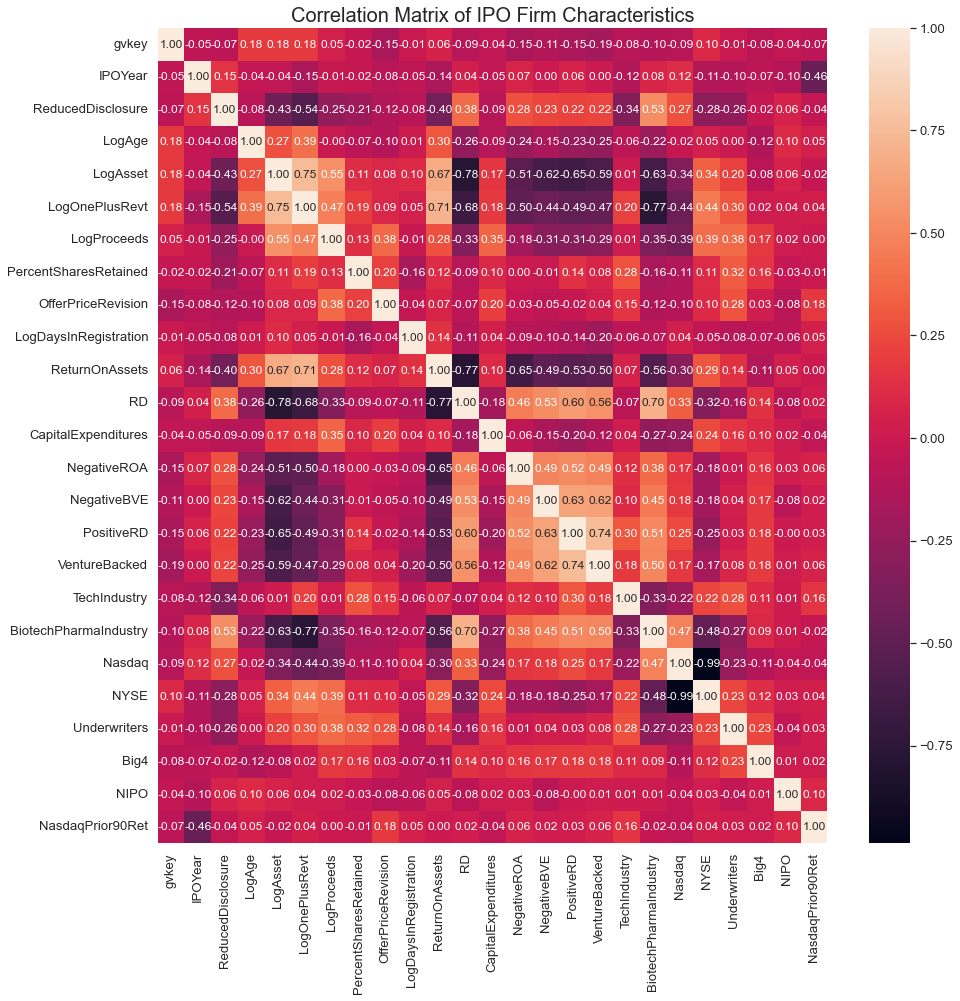

In [57]:
# Tabulate the Correlation Matrix
corr_matrix = disclosure_df.corr()
plt.figure(figsize = (15, 15))
plt.rcParams['font.size'] = 12
sns.heatmap(corr_matrix, annot = True, fmt = '.2f')
plt.title("Correlation Matrix of IPO Firm Characteristics",
          fontsize = 20)
plt.show()

The variable of interest in *ReducedDisclosure*. We see that there are many variables that are correlated with this variable. For example, we see that *LogOnePlusRevt*, *ReturnOnAssets*, and *TechIndustry* are negatively correlated with *ReducedDisclosure*.

#### 2.2.4. Feature Importances
Using a forest of trees, we can evaluate the importance of features based on a mean decrease in impurity.
See <a href = https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html>here</a> for details.


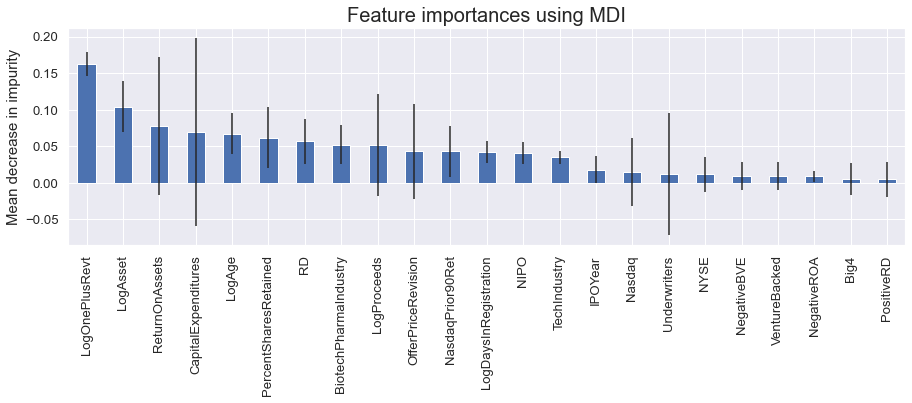

In [59]:
# Import liabrary
from sklearn.ensemble import RandomForestClassifier

# Prepare the features and label
X = disclosure_df.drop(["gvkey", "ReducedDisclosure"], 
                       axis = "columns")
y = disclosure_df["ReducedDisclosure"]

# Fit the data using Random Forest
rf = RandomForestClassifier(random_state=0)
rf.fit(X, y)

# Extract feature importances and their standard deviations
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ 
              for tree in rf.estimators_], axis=0)

# Prepare the data before plotting
forest_importances = pd.Series(importances, index=X.columns,
            name = "importances").sort_values(ascending=False)

# Plot
fig, ax = plt.subplots()
plt.rcParams['font.size'] = 14
forest_importances.plot.bar(yerr=std, ax=ax, figsize = (15,4))
ax.set_title("Feature importances using MDI", fontsize=20)
ax.set_ylabel("Mean decrease in impurity", fontsize=15)
plt.show()


Consistent with the correlation matrix, the above box plots based on the mean decrease in impurity show that *LogOnePlusRevt* and *ReturnOnAssets* are the two most important features.

If my prediction models do not perform well, I am going to select some features by dropping firm characteristics that are not important in the prediction process.

#### 2.2.5. Kernal Density Estimation 
To further visualize the importance of *LogOnePlusRevt* and *ReturnOnAssets*, I will conduct kernal density plots separately for reduced-disclosure firms and other firms.

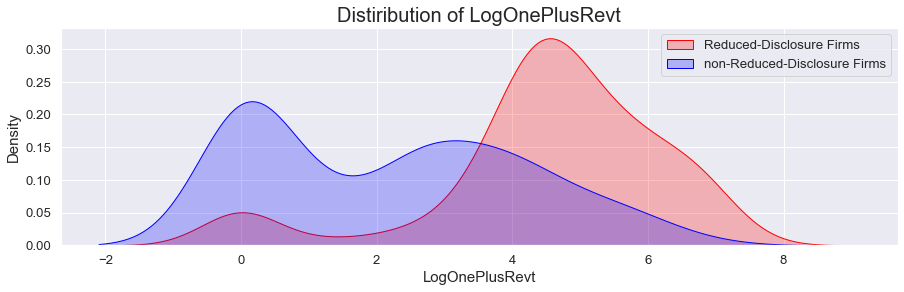

In [61]:
# Create a function that performs Kernel Density Estimation
def kdeplots(var, dataframe):
    """ 
    Plot KDE separately for ReducedDisclosure and others
    """
    
    # Define the figure size
    fig = plt.figure(figsize=(15, 4))
    
    # Generate a scatter plot
    ax = sns.kdeplot(dataframe[var] 
         [(dataframe["ReducedDisclosure"] == 0)],
         color = "Red", shade = True)
    ax = sns.kdeplot(dataframe[var]
         [(dataframe["ReducedDisclosure"] == 1)],
         color = "Blue", shade = True)
   
    # Layout
    ax.legend(["Reduced-Disclosure Firms",
               "non-Reduced-Disclosure Firms"],
              loc = "upper right")
    ax.set_ylabel("Density", fontsize = 15)
    ax.set_xlabel(var, fontsize = 15)
    ax.set_title("Distiribution of {}".format(var), fontsize=20)

# Plot KDEs for LogOnePlusRevt
kdeplots("LogOnePlusRevt", disclosure_df)

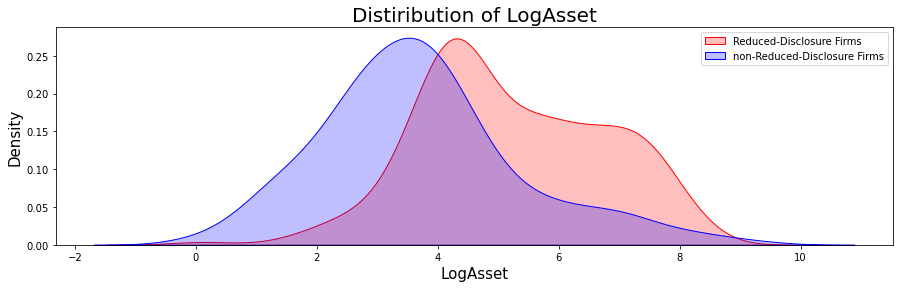

In [9]:
# Plot KDEs for LogOnePlusRevt
kdeplots("LogAsset", disclosure_df)

Both figures confirm that firms with more revenues and assets tend to disclose less.

### 2.3. Prediction 
Now that we have a better understanding of the data and feature importance, we can build classifier models and predict a firm's choice to disclose less.

#### 2.3.1. Preparation

In [63]:
# Prepare features (X) and label (y)
X = disclosure_df.drop(["gvkey", "ReducedDisclosure"],
                       axis = "columns")
y = disclosure_df["ReducedDisclosure"]

In [64]:
# View the shapes of X and y
X.shape, y.shape

((380, 23), (380,))

In [65]:
# Import library
from sklearn.model_selection import train_test_split

# Split the samples into train and test sets
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size = 0.2, random_state=1)

# View the shapes of all dataframes
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((304, 23), (76, 23), (304,), (76,))

#### 2.3.2. Logistic Regression
We will start with Logistic Regression to build a model and predict firms' choices. The Python code is fairly simple:

In [13]:
# Import library
from sklearn.linear_model import LogisticRegression

# Instantiate and fit the model 
model_lr = LogisticRegression(max_iter=10000)
model_lr.fit(X_train, y_train)

# Predict the classification
y_predict = model_lr.predict(X_test)

Now that we have predictions, let's evaluate the model using a Confusion Matrix as well as Precision & Recall scores. Since I am going to build Confusion Matrices repeatedly, I will write a function.

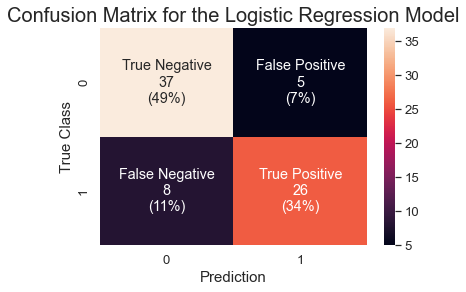

In [67]:
# Import library
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score

# Create a function to tabulate Confusion Matrix
def cm_function(matrix_input, y_test_input, title):
    ''' Function to plot Confusion Matrix '''
    
    # Gather values and labels that will be used in the matrix
    group_names = ['True Negative','False Positive',
          'False Negative','True Positive']
    group_counts = ["{0:0.0f}".format(value) for value 
          in matrix_input.flatten()]
    group_percentages = ["({0:0.0%})".format(value) 
          for value in matrix_input.flatten()/y_test_input.count()]
    
    # Create 4 texts that will be shown in each box of the matrix
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names, group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    
    # Plot the matrix and adjust the format
    sns.set(font_scale = 1.2)
    fig = sns.heatmap(matrix_input, fmt='', annot = labels)
    plt.title(title, fontsize=20)
    plt.xlabel("Prediction", fontsize = 15)
    plt.ylabel("True Class", fontsize = 15) 
    plt.show()

# Process and tabulate the Confusion Matrix
cm = confusion_matrix(y_test, y_predict)
cm_function(cm, y_test, 
            "Confusion Matrix for the Logistic Regression Model")

In [15]:
# Store precision and recall scores for later use
precision_score_lr = precision_score(y_test, y_predict)
recall_score_lr = recall_score(y_test, y_predict)

# Report accuracy, precision, and recall
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.78      0.93      0.85        42
           1       0.88      0.68      0.77        34

    accuracy                           0.82        76
   macro avg       0.83      0.80      0.81        76
weighted avg       0.83      0.82      0.81        76



The Logistic Regression model has an accuracy of 0.83, a precision of 0.88, and a recall of 0.68, which are pretty good values!

#### 2.3.3. Naive Bayes Classifier
Next, we will build another model and predict using Naive Bayes. We are going to use Gaussian Naive Bayes Classifier for continuous variables because as shown in the above histogram, we see that most continuous variables follow a normal distribution.

In [16]:
# Import library
from sklearn.naive_bayes import GaussianNB

# Instantiate and fit the model 
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

# Predict the classification
y_predict = model_nb.predict(X_test)

Evaluate the model using a Confusion Matrix as well as Precision & Recall scores.

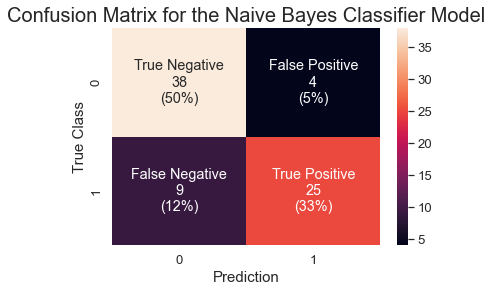

In [17]:
# Process and tabulate the Confusion Matrix
cm = confusion_matrix(y_test, y_predict)
cm_function(cm, y_test, \
            "Confusion Matrix for the Naive Bayes Classifier Model")

In [18]:
# Store precision and recall scores for later use
precision_score_nb = precision_score(y_test, y_predict)
recall_score_nb = recall_score(y_test, y_predict)

# Report accuracy, precision, and recall
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85        42
           1       0.86      0.74      0.79        34

    accuracy                           0.83        76
   macro avg       0.84      0.82      0.82        76
weighted avg       0.83      0.83      0.83        76



The Naive Bayes model also has an accuracy of 0.83, a precision of 0.86, and a recall of 0.74, which are, once again, pretty good values!

#### 2.3.4. K-Nearest Neighbors
Build a model and predict using K-Nearest Neighbor. Because KNN uses Euclidean distances, we first have to standardize the features.  

In [19]:
# Import library
from sklearn import preprocessing

# Standardize X_train and X_test
X_train_std = preprocessing.StandardScaler().fit_transform(X_train)
X_test_std = preprocessing.StandardScaler().fit_transform(X_test)

For K-Nearest Neighbors, we have to select K. We will select it based on a figure of error rates. Another popular method to choose K is using the Grid Search method. However, because I prefer to show figures whenever possible, I will go with the figure approach.

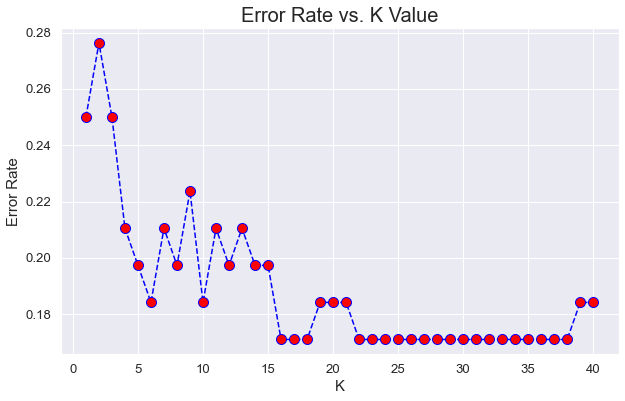

In [20]:
# Import library
from sklearn.neighbors import KNeighborsClassifier
    
# For each K from 1 to 40, we will compute the error rate
error_rate = []
for i in range(1,41):
 model_knn = KNeighborsClassifier(n_neighbors=i)
 model_knn.fit(X_train_std,y_train)
 pred_i = model_knn.predict(X_test_std)
 error_rate.append(np.mean(pred_i != y_test))

# Plot the error rate against K Values
plt.figure(figsize=(10,6))
plt.plot(range(1,41), error_rate, color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value', fontsize = 20)
plt.xlabel('K', fontsize = 15)
plt.ylabel('Error Rate', fontsize = 15)
plt.show()

In [55]:
# Print the K with the minimum error rate
print("Minimum error:-",min(error_rate),
      "at K =",error_rate.index(min(error_rate))+1)

Minimum error:- 0.17105263157894737 at K = 16


As shown in the figure above, most values >= 16 have the minimum error rates. Thus, we will select K=16.

In [22]:
# Instantiate and fit the model 
model_knn = KNeighborsClassifier(n_neighbors=16)
model_knn.fit(X_train_std,y_train)

# Predict the classification
y_predict = model_knn.predict(X_test_std)

Evaluate the model using a Confusion Matrix as well as Precision & Recall scores.

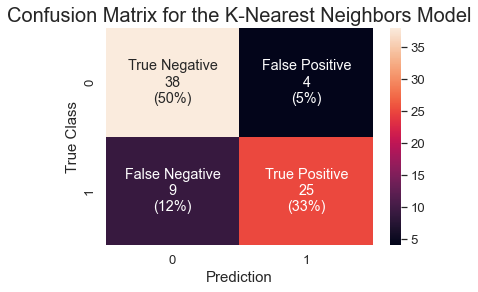

In [23]:
# Process and tabulate the Confusion Matrix
cm = confusion_matrix(y_test, y_predict)
cm_function(cm, y_test, 
            "Confusion Matrix for the K-Nearest Neighbors Model")

In [24]:
# Store precision and recall scores for later use
precision_score_knn = precision_score(y_test, y_predict)
recall_score_knn = recall_score(y_test, y_predict)

# Report accuracy, precision, and recall
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85        42
           1       0.86      0.74      0.79        34

    accuracy                           0.83        76
   macro avg       0.84      0.82      0.82        76
weighted avg       0.83      0.83      0.83        76



The K-Nearest Neighbor model has accuracy, precision, and recall values that are similar to other models.

#### 2.3.5. Support Vector Machine - Grid Search Cross Validation
Before using the Support Vector Machine, there are two important hyperparameters we need to consider: which gamma and C values to use. Check out <a href = "https://towardsdatascience.com/hyperparameter-tuning-for-support-vector-machines-c-and-gamma-parameters-6a5097416167">this blog</a>, which summarizes them very well.

1. C parameter: Penalty for each misclassified data point (default 1.0)
2. gamma: Hyperparameter used only for Gaussian RBF kernel; determines the range of each training eaxample reaches  (default: 1 / (n_features * X.var()))

In [25]:
# Import libraries
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
 
# Define the hyperparameters
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

# Instantiate GridSearchCV
# use 5-fold cv and f1 score to choose the best model
gs_svm = GridSearchCV(SVC(probability=True), 
                      param_grid = param_grid, cv=5, scoring='f1')

# Fit the model
gs_svm.fit(X_train , y_train)

# Predict the classification
y_predict = gs_svm.predict(X_test)

# Print the best parameters
print(gs_svm.best_params_)

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


The model with the highest f1 score has the {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'} hyperparameters.

Next, we will evaluate the model using a Confusion Matrix as well as Precision & Recall scores.

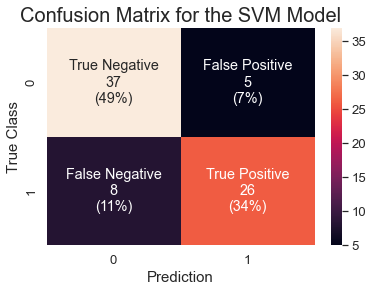

In [26]:
# Process and tabulate the Confusion Matrix
cm = confusion_matrix(y_test, y_predict)
cm_function(cm, y_test, "Confusion Matrix for the SVM Model")

In [27]:
# Store precision and recall scores for later use
precision_score_svm = precision_score(y_test, y_predict)
recall_score_svm = recall_score(y_test, y_predict)

# Report accuracy, precision, and recall
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85        42
           1       0.84      0.76      0.80        34

    accuracy                           0.83        76
   macro avg       0.83      0.82      0.83        76
weighted avg       0.83      0.83      0.83        76



The best SVM model has accuracy, precision, and recall values that are similar to other models.

#### 2.3.6. Random Forest - Grid Search Cross Validation
There are many important hyperparameters we need to consider before using the Random Forest algorithm.

Important ones are summarized below (we have to consider the bias-variance tradeoff for each):</br>
1. N_estimators: The number of decision trees used in the forest (default = 100); having too few trees may lead to overfitting since it becomes closers to a single decision tree
2. Max_depth: The maximum depth of the tree (default = none, meaning that trees are branched until all leaves are pure); by going too deep, we face a risk of overfitting
3. Min_samples_split: The minimum number of samples required to branch further (default 2); we can lower the risk of overfitting by increasing the minimum sample requirement

In [28]:
# Import libraries
from sklearn.ensemble import RandomForestClassifier

# Define the hyperparameters
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 1, 5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

# Instantiate GridSearchCV
gs_rf = GridSearchCV(RandomForestClassifier(), 
                     param_grid = param_grid, cv=5, scoring='f1')

# Fit the model
gs_rf.fit(X_train , y_train)

# Predict the classification
y_predict = gs_rf.predict(X_test)

# Print the best parameters
print(gs_rf.best_params_)

{'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}


The model with the highest f1 score has the {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 150} hyperparameters.

Next, we will evaluate the model using a Confusion Matrix as well as Precision & Recall scores.

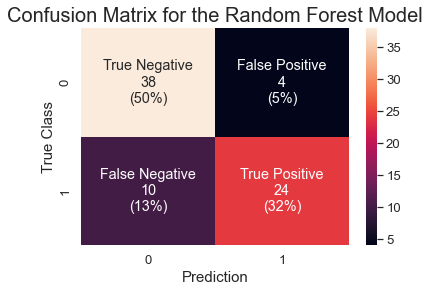

In [29]:
# Process and tabulate the Confusion Matrix
cm = confusion_matrix(y_test, y_predict)
cm_function(cm, y_test, 
            "Confusion Matrix for the Random Forest Model")

In [30]:
# Store precision and recall scores for later use
precision_score_rf = precision_score(y_test, y_predict)
recall_score_rf = recall_score(y_test, y_predict)

# Report accuracy, precision, and recall
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        42
           1       0.86      0.71      0.77        34

    accuracy                           0.82        76
   macro avg       0.82      0.81      0.81        76
weighted avg       0.82      0.82      0.81        76



The best Random Forest model has accuracy, precision, and recall values that are similar to other models.

#### 2.3.7. Ada Boost - Grid Search Cross Validation
Ada Boost also has several hyperparameters to consider.

Important ones are summarized below (we have to consider the bias-variance tradeoff for each):</br>
1. N_estimators: The number of decision trees used in the ensemble (default = 50)
2. Learning_rate: The rate at which each model contributes to the prediction (default 1.0, i.e., full contribution) 

In [31]:
# Import libraries
from sklearn.ensemble import AdaBoostClassifier

# Define the hyperparameters
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.8, 1, 1.2]
}

# Instantiate GridSearchCV 
gs_ab = GridSearchCV(AdaBoostClassifier(), 
                     param_grid = param_grid, cv=5, scoring='f1')

# Fit the model
gs_ab.fit(X_train , y_train)

# Predict the classification
y_predict = gs_ab.predict(X_test)

# Print the best parameters
print(gs_ab.best_params_)

{'learning_rate': 0.8, 'n_estimators': 50}


The model with the highest f1 score has the {'learning_rate': 0.8, 'n_estimators': 50} hyperparameters.

Next, we will evaluate the model using a Confusion Matrix as well as Precision & Recall scores.

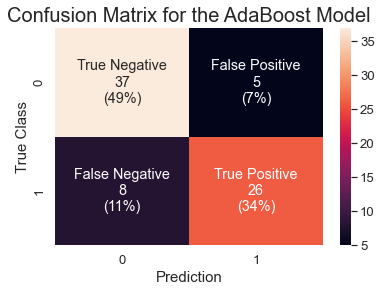

In [32]:
# Process and tabulate the Confusion Matrix
cm = confusion_matrix(y_test, y_predict)
cm_function(cm, y_test, "Confusion Matrix for the AdaBoost Model")

In [33]:
# Store precision and recall scores for later use
precision_score_ab = precision_score(y_test, y_predict)
recall_score_ab = recall_score(y_test, y_predict)

# Report accuracy, precision, and recall
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85        42
           1       0.84      0.76      0.80        34

    accuracy                           0.83        76
   macro avg       0.83      0.82      0.83        76
weighted avg       0.83      0.83      0.83        76



The best AdaBoost model also has accuracy, precision, and recall values that are similar to other models.

### 2.4. Compare the Models' AUC
#### 2.4.1. Preparation
In this section, I am going to plot Receiver Operating Characteristic (ROC) curves for each model and compute the Area Under the ROC Curve (AUC).

I am going to start by extrating ture and false positive rates and computing AUC Scores.

In [68]:
# Import library
from sklearn.metrics import roc_curve, roc_auc_score

# Extract true and false positive rates for each model
fpr1, tpr1, thresh1 = roc_curve(
    y_test, model_nb.predict_proba(X_test)[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(
    y_test, gs_ab.predict_proba(X_test)[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(
    y_test, gs_rf.predict_proba(X_test)[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(
    y_test, model_lr.predict_proba(X_test)[:,1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(
    y_test, gs_svm.predict_proba(X_test)[:,1], pos_label=1)
fpr6, tpr6, thresh6 = roc_curve(
    y_test, model_knn.predict_proba(X_test)[:,1], pos_label=1)

# Compute AUC scores for each model
auc_score_nb = roc_auc_score(y_test, 
                             model_nb.predict_proba(X_test)[:,1])
auc_score_ab = roc_auc_score(y_test, 
                             gs_ab.predict_proba(X_test)[:,1])
auc_score_rf = roc_auc_score(y_test, 
                             gs_rf.predict_proba(X_test)[:,1])
auc_score_lr = roc_auc_score(y_test, 
                             model_lr.predict_proba(X_test)[:,1])
auc_score_svm = roc_auc_score(y_test, 
                              gs_svm.predict_proba(X_test)[:,1])
auc_score_knn = roc_auc_score(y_test, 
                              model_knn.predict_proba(X_test)[:,1])

#### 2.4.2. Plot ROC curves and display AUC scores

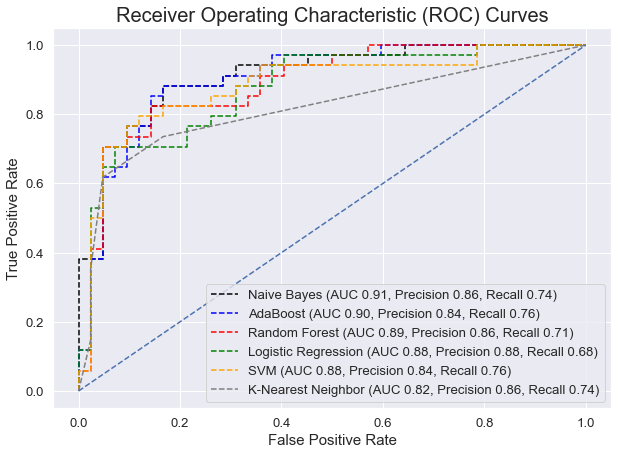

In [69]:
plt.figure(figsize=(10,7))
plt.title('Receiver Operating Characteristic (ROC) Curves', 
    fontsize = 20)
plt.plot(fpr1, tpr1, linestyle = "--", color = "black", label = \
    "Naive Bayes (AUC %0.2f, Precision %0.2f, Recall %0.2f)"
    % (auc_score_nb, precision_score_nb, recall_score_nb))
plt.plot(fpr2, tpr2, linestyle = "--", color = "blue", label = \
    "AdaBoost (AUC %0.2f, Precision %0.2f, Recall %0.2f)" 
    % (auc_score_ab, precision_score_ab, recall_score_ab))
plt.plot(fpr3, tpr3, linestyle = "--", color = "red", label = \
    "Random Forest (AUC %0.2f, Precision %0.2f, Recall %0.2f)" 
    % (auc_score_rf, precision_score_rf, recall_score_rf))
plt.plot(fpr4, tpr4, linestyle = "--", color = "green", label = \
    "Logistic Regression (AUC %0.2f, Precision %0.2f, Recall %0.2f)" 
    % (auc_score_lr, precision_score_lr, recall_score_lr))
plt.plot(fpr5, tpr5, linestyle = "--", color = "orange", label = \
    "SVM (AUC %0.2f, Precision %0.2f, Recall %0.2f)" 
    % (auc_score_svm, precision_score_svm, recall_score_svm))
plt.plot(fpr6, tpr6, linestyle = "--", color = "gray", label = \
    "K-Nearest Neighbor (AUC %0.2f, Precision %0.2f, Recall %0.2f)" 
    % (auc_score_knn, precision_score_knn, recall_score_knn))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.ylabel('True Positive Rate', fontsize = 15) 
plt.xlabel('False Positive Rate', fontsize = 15)
plt.show()

The above figure shows that the Naive Bayes model has the highest AUC and one of the highest precision and recall scores. But more importantly, we can see that most models perform really well in modeling firms' disclosure choices.

In conclusion, this analysis lends support to the argument that it is not the reduced-disclosure choice per see leading to more prevalent overpricing but rather the characteristics of IPO firms that choose to scale back their financial disclosures.